In [5]:
import pandas as pd
import numpy as np 

<h1>I. READ DATA<h1>

In [6]:
dataset = pd.read_csv("zoo.csv")

In [7]:
dataset.shape

(101, 18)

In [8]:
dataset.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [9]:
dataset.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


<h1>II. TIỀN SỬ LÝ DỮ LIỆU (PREPROCESS).<h1>
<h2>2.1. Kiểm tra thiếu dữ liệu (missing data)<h2>

In [6]:
dataset.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

Vậy không có dữ liệu nào bị thiếu

<h2>2.2. Kiểm tra dữ liệu bị trùng (duplicated)<h2>

In [10]:
#Đếm số tên động vật (cột animal_name) bị trùng
duplicates = dataset.duplicated(['animal_name']).sum()
print(duplicates)

1


Vậy là có 1 tên động vật bị trùng

In [11]:
duplicates = dataset.animal_name.value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal_name, dtype: int64

Vậy có 2 con vật có chung tên "frog"

In [12]:
frog = dataset.loc[dataset["animal_name"]=="frog"]
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


Ta thấy, điểm khác biệt duy nhất giữa 2 con 'frog' là thuộc tính 'venomous'.<br>
Vậy, ta sẽ đổi tên một con thành 'venomous_frog'

In [13]:
#đổi tên một con 'frog' thành 'venomous_frog'
dataset["animal_name"][(dataset.venomous == 1) & (dataset.animal_name == "frog")] = "venomous_frog"

<ipython-input-13-3693c681610a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["animal_name"][(dataset.venomous == 1) & (dataset.animal_name == "frog")] = "venomous_frog"


<h2>2.3. Check data type & visualize data<h2>

In [14]:
class_dataset = pd.read_csv("class.csv")
class_dataset.shape


(7, 4)

In [15]:
class_dataset.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [16]:
p = pd.DataFrame(class_dataset, columns=['Class_Type', 'Number_Of_Animal_Species_In_Class'])
p.columns = ["Type", "Number"]
p['Percent'] = (p["Number"]/(p["Number"].sum())) * 100
p.sort_values(by=['Number'])
p

,Type,Number,Percent
0,Mammal,41,40.594059
1,Bird,20,19.801980
2,Reptile,5,4.950495
3,Fish,13,12.871287
4,Amphibian,4,3.960396
5,Bug,8,7.920792
6,Invertebrate,10,9.900990


<AxesSubplot:xlabel='Class_Type', ylabel='Number_Of_Animal_Species_In_Class'>

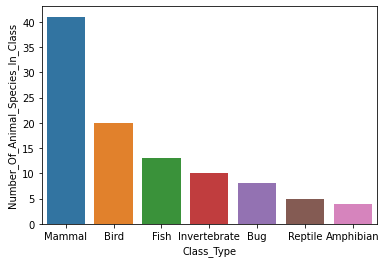

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.barplot(x='Class_Type', y='Number_Of_Animal_Species_In_Class', data=class_dataset, order=class_dataset.sort_values('Number_Of_Animal_Species_In_Class', ascending = False).Class_Type)

# sns.countplot(class_dataset['Class_Type'], order=class_dataset["Class_Type"])
# plt.show()

In [17]:
zoo_full = dataset.merge(class_dataset, how='left', left_on='class_type', right_on='Class_Number')
zoo_full.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


In [18]:
#Set feature and target
feature = ['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed',
                 'backbone','breathes','venomous','fins','legs','tail','domestic']
zoo_full["classtype"] = 1


In [ ]:
# for i in feature:
#     g = sns.FacetGrid(zoo_full, col="Class_Type", row=i, hue="Class_Type")
#     g.map(plt.hist,"classtype")
#     g.set(xticklabels=[])
#     plt.subplots_adjust(top=0.9)
#     g.fig.suptitle(i)

<AxesSubplot:ylabel='Class_Type'>

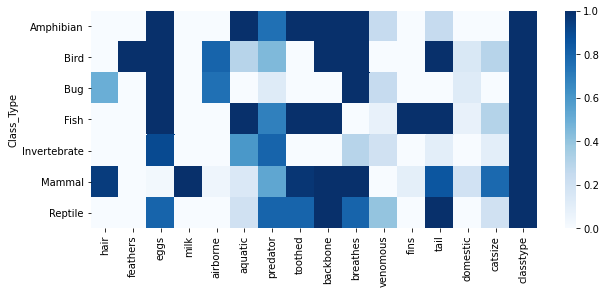

In [21]:
heat = zoo_full.groupby(by='Class_Type').mean()
heat.drop(columns=['class_type','Class_Number','Number_Of_Animal_Species_In_Class','legs'],inplace=True, axis=1)
plt.subplots(figsize=(10,4))
sns.heatmap(heat, cmap="Blues")

<AxesSubplot:xlabel='Class_Type', ylabel='legs'>

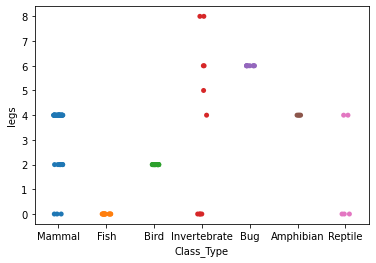

In [18]:
sns.stripplot(x=zoo_full['Class_Type'], y=zoo_full['legs'])

<h2>2.4. Train-test split<h2>

In [22]:
X = dataset[feature]
y = dataset['class_type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)


<h1>III. DECISION TREE CLASSIFICATION<h1>

In [63]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(random_state = 0,criterion='gini')
decisionTree.fit(X_train, y_train)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = decisionTree.predict(X_test)
print('Accuracy of classifier on test set: {:.2f}'
     .format(decisionTree.score(X_test, y_test)))
print()
print(confusion_matrix(y_test, pred))
print()
print(classification_report(y_test, pred))

Accuracy of classifier on test set: 0.90

[[21  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  0  0  4  1]]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        10
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         7
           5       1.00      0.50      0.67         2
           6       0.50      1.00      0.67         4
           7       1.00      0.20      0.33         5

    accuracy                           0.90        51
   macro avg       0.88      0.81      0.78        51
weighted avg       0.95      0.90      0.89        51



In [74]:
zoo_full[['class_type', 'Class_Type']].drop_duplicates().sort_values(by='class_type')

,class_type,Class_Type
0,1,Mammal
11,2,Bird
62,3,Reptile
2,4,Fish
25,5,Amphibian
24,6,Bug
13,7,Invertebrate


In [81]:
importance = pd.DataFrame(decisionTree.feature_importances_)
feat = pd.DataFrame(feature)

feat_imp = pd.concat([feat, importance], axis=1, ignore_index=True)
feat_imp.columns = ["Features", "Importance"]
feat_imp.sort_values(by="Importance", ascending=False, inplace=True)

feat_imp


,Features,Importance
1,feathers,0.380454
0,hair,0.213787
4,airborne,0.140239
5,aquatic,0.116347
3,milk,0.086346
6,predator,0.062827
2,eggs,0.000000
7,toothed,NaN
8,backbone,NaN
9,breathes,NaN


In [83]:
feat.columns=['Features']
feat

,Features
0,hair
1,feathers
2,eggs
3,milk
4,airborne
5,aquatic
6,predator
7,toothed
8,backbone
9,breathes


In [89]:
from sklearn import tree

text_representation = tree.export_text(decisionTree)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_4 <= 0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- feature_5 <= 3.00
|   |   |   |   |   |--- class: 7
|   |   |   |   |--- feature_5 >  3.00
|   |   |   |   |   |--- feature_5 <= 7.00
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- feature_5 >  7.00
|   |   |   |   |   |   |--- class: 7
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |--- class: 3
|   |   |--- feature_4 >  0.50
|   |   |   |--- class: 4
|   |--- feature_0 >  0.50
|   |   |--- class: 2
|--- feature_1 >  0.50
|   |--- class: 1



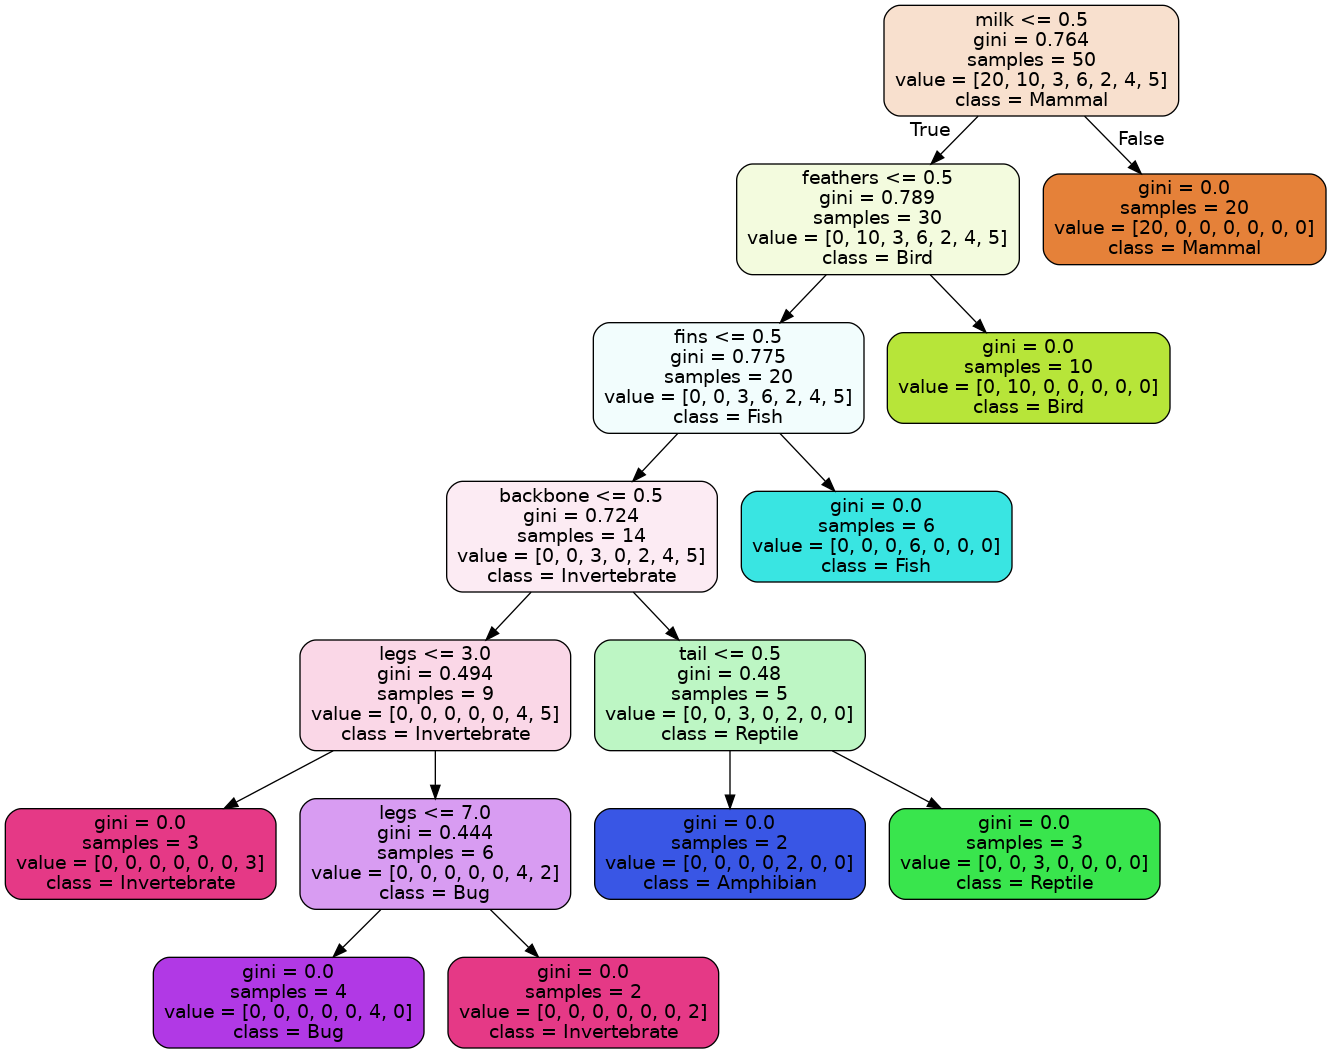

In [92]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from pydotplus import graph_from_dot_data


global tree  
# Get the tree
tree = []
tree = decisionTree

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=class_dataset["Class_Type"],
                           feature_names=X.columns,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

Image(graph.create_png())

In [93]:
chosen_feat = feat_imp[feat_imp['Importance'] > 0]
visible_feat = chosen_feat['Features']
visible_feat_sorted = visible_feat.sort_index()
visible_feat_sorted

0        hair
1    feathers
3        milk
4    airborne
5     aquatic
6    predator
Name: Features, dtype: object

In [94]:
X = dataset[visible_feat_sorted]
y = dataset['class_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)

decisionTree2 = DecisionTreeClassifier(random_state = 0,criterion='gini')
decisionTree2.fit(X_train, y_train)

pred = decisionTree2.predict(X_test)
print('Accuracy of classifier on test set: {:.2f}'
     .format(decisionTree2.score(X_test, y_test)))
print()
print(confusion_matrix(y_test, pred))
print()
print(classification_report(y_test, pred))

Accuracy of classifier on test set: 0.82

[[21  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  1  1  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  1  0  0  3  0]
 [ 0  0  1  4  0  0  0]]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        10
           3       0.33      0.50      0.40         2
           4       0.50      1.00      0.67         7
           5       0.00      0.00      0.00         2
           6       1.00      0.75      0.86         4
           7       0.00      0.00      0.00         5

    accuracy                           0.82        51
   macro avg       0.55      0.61      0.56        51
weighted avg       0.77      0.82      0.78        51

/home/xuantung/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with

In [95]:
importance2 = pd.DataFrame(decisionTree2.feature_importances_)
feat2 = pd.DataFrame(visible_feat)

feat2.reset_index(drop=True, inplace=True)

feat_imp2 = pd.concat([feat2, importance2], axis=1, ignore_index=True)
feat_imp2.columns = ["Features", "Importance"]
feat_imp2.sort_values(by="Importance", ascending=False, inplace=True)

feat_imp2


,Features,Importance
2,airborne,0.506977
1,hair,0.284884
4,milk,0.115116
0,feathers,0.047093
5,predator,0.045930
3,aquatic,0.000000


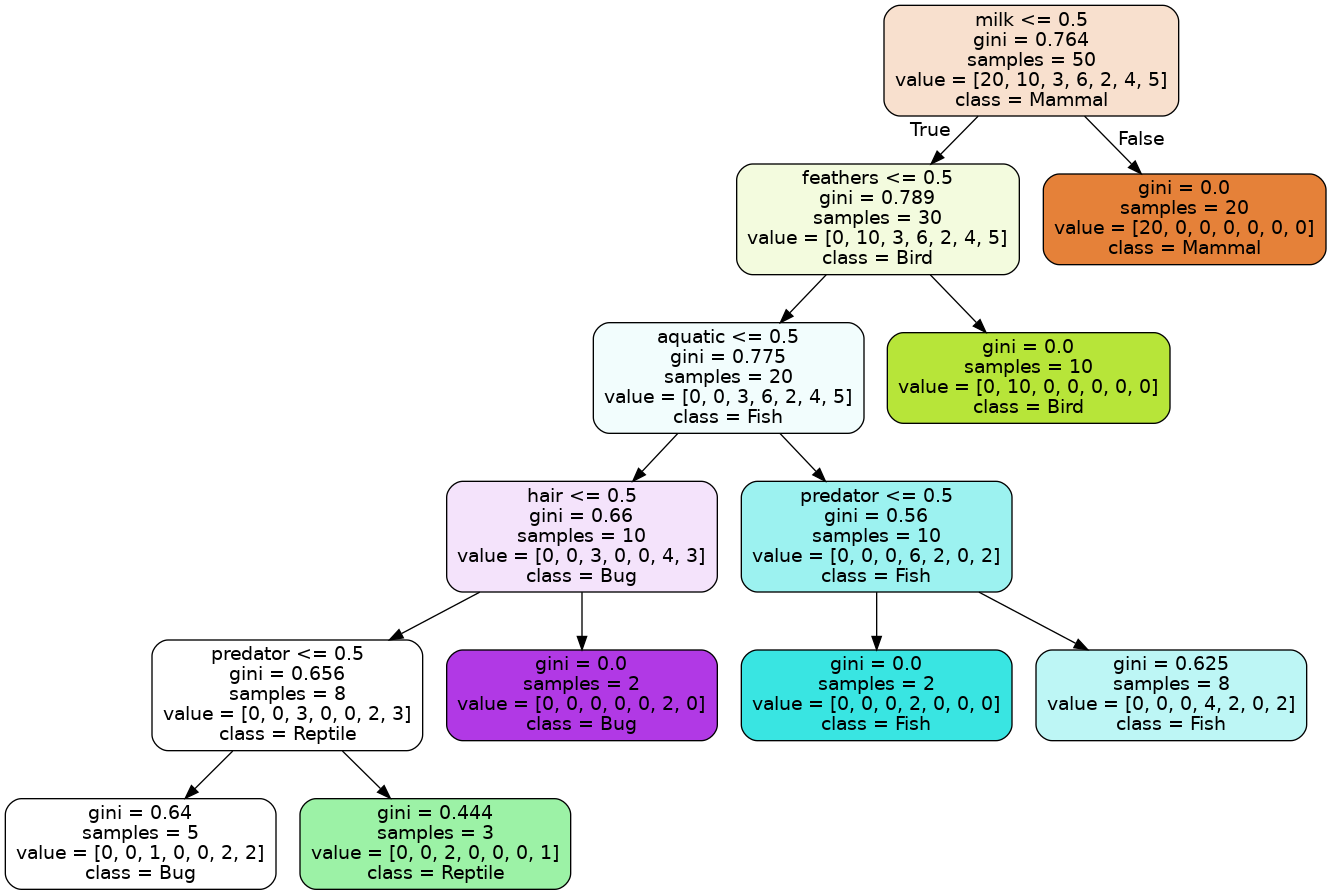

In [96]:
tree = decisionTree2

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=class_dataset["Class_Type"],
                           feature_names=X.columns,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

Image(graph.create_png())

<h1>RANDOM FOREST<h1>

In [32]:
from sklearn.ensemble import RandomForestClassifier
#name of model is: randomForest
randomForest = RandomForestClassifier(n_estimators=40)
randomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [25]:
randomForest.score(X_test, y_test)

0.9607843137254902

In [33]:
y_predicted = randomForest.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[21,  0,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  5]])

Text(69.0, 0.5, 'Truth')

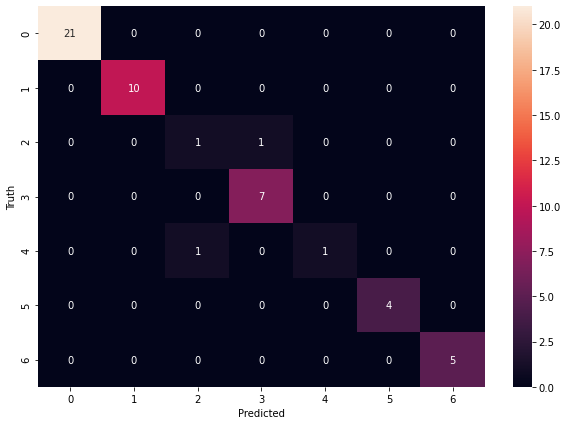

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Best Score =  0.9803921568627451
Best n_estimators =  50


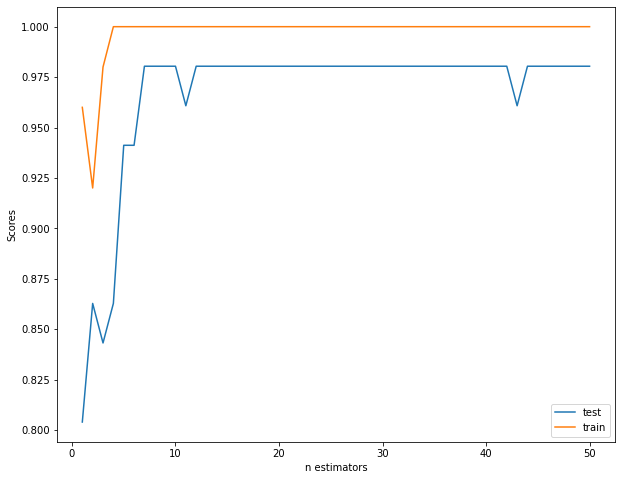

In [29]:
s_max = 0
rf_train_score_list = []
rf_test_score_list = []
for i in range(1,X_train.shape[0]+1):
    rf = RandomForestClassifier(n_estimators = i,random_state = 42)
    rf.fit(X_train,y_train)
    test_score = rf.score(X_test,y_test)
    rf_test_score_list.append(test_score)
    train_score = rf.score(X_train,y_train)
    rf_train_score_list.append(train_score)
    if test_score >= s_max :
        s_max = test_score
        index = i

print("Best Score = ",s_max)
print("Best n_estimators = ",index)

plt.figure(figsize = (10,8))
plt.plot(range(1,X_train.shape[0]+1),rf_test_score_list,label = "test")
plt.plot(range(1,X_train.shape[0]+1),rf_train_score_list,label = "train")
plt.legend()
plt.xlabel("n estimators")
plt.ylabel("Scores")
plt.show()

<h1>V. SUPPORT VECTOR MACHINE<h1>

In [30]:
from sklearn.svm import SVC
#declare model
svm = SVC(kernel = 'linear', C = 1e5)
#fit model
svm.fit(X_train, y_train)
#check accuracy:
y_pred_svm = svm.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred_svm, y_test)
print(accuracy)


0.9411764705882353


<h1>VI. NAIVE-BAYES CLASSIFICATION<h1>


In [99]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
print("Test Accurary : ",nb.score(X_test,y_test))
print("Train Accurary : ",nb.score(X_train,y_train))

Test Accurary :  0.7058823529411765
Train Accurary :  0.78


In [100]:
from sklearn.metrics import confusion_matrix, classification_report
cm_nb = confusion_matrix(y_test,y_pred_nb)
cr_nb = classification_report(y_test,y_pred_nb)
print("confusion matrix : \n",cm_nb)
print("classification report : \n",cr_nb)

confusion matrix : 
 [[19  0  0  0  0  2  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  2  5  0  0]
 [ 0  0  0  1  1  0  0]
 [ 0  0  1  0  0  3  0]
 [ 0  0  1  0  4  0  0]]
classification report : 
               precision    recall  f1-score   support

           1       1.00      0.90      0.95        21
           2       1.00      1.00      1.00        10
           3       0.33      0.50      0.40         2
           4       0.67      0.29      0.40         7
           5       0.09      0.50      0.15         2
           6       0.60      0.75      0.67         4
           7       0.00      0.00      0.00         5

    accuracy                           0.71        51
   macro avg       0.53      0.56      0.51        51
weighted avg       0.76      0.71      0.72        51

/home/xuantung/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels 

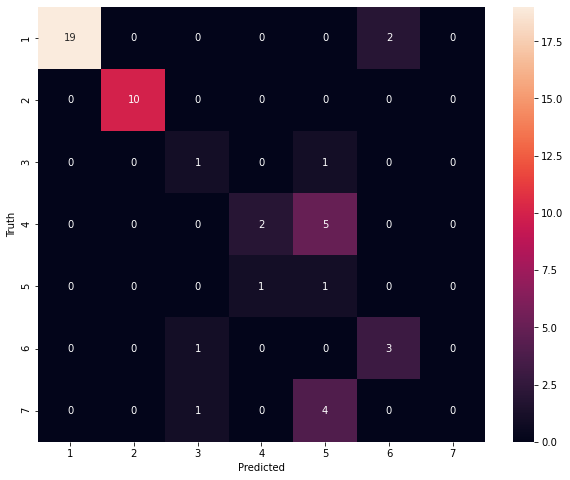

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,8))
sn.heatmap(cm_nb,annot = True,xticklabels = np.arange(1,8),yticklabels = np.arange(1,8))
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()